In [1]:

import random
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Research/Thesis (4 - II)/Classification/Data/Jahid/Data.zip', 'r')
file = zip_ref.extractall("./tmp")
zip_ref.close()

print("o")

o


In [4]:
DATASET="/content/tmp"


In [5]:
CATEGORIES = ['CNV', 'DME', 'DRUSEN', 'NORMAL']
        
train_data=[]
hog_data = []

# `HOG`

In [6]:
from skimage import feature

def hog_image(image):
	# compute the histogram of oriented gradients feature vector for
	# the input image
	features = feature.hog(image, orientations=9,
		pixels_per_cell=(10, 10), cells_per_block=(2, 2),
		transform_sqrt=True, block_norm="L1")
	# return the feature vector
	return features

In [7]:
import os
import tensorflow as tf

import cv2
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv2.imread(os.path.join(path,img_file),1)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,(224,224))
            hog_img =  hog_image(img)           
            train_data.append([img,label])
            hog_data.append([hog_img,label])
            

print(len(train_data))
print(len(hog_data))

3637
3637


In [8]:
random.shuffle(hog_data)
random.shuffle(hog_data)
random.shuffle(hog_data)
random.shuffle(hog_data)

In [9]:
for lbl in hog_data[:10]:
    print(lbl[1])

0
2
1
2
3
3
1
2
3
2


In [10]:
X, y = [], []
for features,label in hog_data:
    X.append(features)
    y.append(label)


In [11]:
len(X)

3637

In [12]:
# plt.imshow(hog_data[0][0])

In [13]:
X_arr = np.array(X)
y_arr = np.array(y)
X_arr.shape, y_arr.shape

((3637, 15876), (3637,))

In [14]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X_arr, y_arr, test_size=0.2, shuffle=True, random_state=9990)


In [15]:
Xtrain.shape

(2909, 15876)

# SVM

In [16]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc = SVC(kernel='rbf', class_weight='balanced')
model_svm = make_pipeline(svc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
param_grid = {'svc__C': [50],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model_svm, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = model_svm

In [18]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=CATEGORIES))

              precision    recall  f1-score   support

         CNV       0.85      0.97      0.91       189
         DME       0.82      0.77      0.79       180
      DRUSEN       0.74      0.70      0.72       194
      NORMAL       0.78      0.76      0.77       165

    accuracy                           0.80       728
   macro avg       0.80      0.80      0.80       728
weighted avg       0.80      0.80      0.80       728



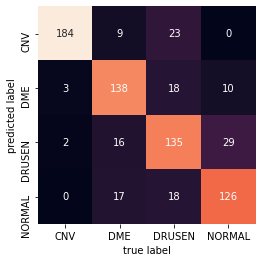

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [22]:
import pickle

a = {'hello': 'world'}

with open('/content/drive/MyDrive/hog_svm.pickle', 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
img = cv2.imread('/content/3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))

hog_feature = hog_image(img)


test_sample = hog_feature.reshape(1, hog_feature.shape[0])

pred = model.predict(test_sample)
print(CATEGORIES[pred[0]])

plt.imshow(img)

In [ ]:
ss

# `PCA With SVM` 

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model_pca_svm = make_pipeline(pca, svc)

In [ ]:
param_grid = {'svc__C': [50],
              'svc__gamma': [0.005]}
grid = GridSearchCV(model_pca_svm, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

In [ ]:
model = model_pca_svm

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=CATEGORIES))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=CATEGORIES,
            yticklabels=CATEGORIES)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
img = cv2.imread('/content/3.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))

hog_feature = hog_image(img)


test_sample = hog_feature.reshape(1, hog_feature.shape[0])

pred = model.predict(test_sample)
print(CATEGORIES[pred[0]])

plt.imshow(img)